#Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
df.shape

(450, 13)

In [ ]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
df[numeric_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
from scipy import stats
for col in numeric_cols:
  mean_val = df[col].mean()
  median_val = df[col].median()
  mode_val = df[col].mode()[0]
  std_dev_val = df[col].std()
  print(f"Column: {col}")
  print(f"  Mean: {mean_val}")
  print(f"  Median: {median_val}")
  print(f"  Mode: {mode_val}")
  print(f"  Standard Deviation: {std_dev_val}")
  print("-" * 20)

Column: Volume
  Mean: 5.066666666666666
  Median: 4.0
  Mode: 3
  Standard Deviation: 4.231602391213926
--------------------
Column: Avg Price
  Mean: 10453.433333333332
  Median: 1450.0
  Mode: 400
  Standard Deviation: 18079.90483993645
--------------------
Column: Total Sales Value
  Mean: 33812.83555555555
  Median: 5700.0
  Mode: 24300
  Standard Deviation: 50535.07417255328
--------------------
Column: Discount Rate (%)
  Mean: 15.155241895330914
  Median: 16.57776564929597
  Mode: 5.007822189204133
  Standard Deviation: 4.220602153325511
--------------------
Column: Discount Amount
  Mean: 3346.499424342415
  Median: 988.9337332382784
  Mode: 69.17794228822787
  Standard Deviation: 4509.9029633539985
--------------------
Column: Net Sales Value
  Mean: 30466.336131270138
  Median: 4677.788059301853
  Mode: 326.97480055470817
  Standard Deviation: 46358.656624066934
--------------------


#Data Visualization

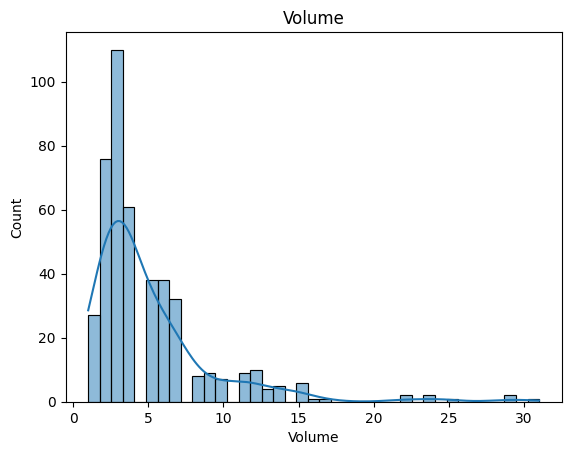

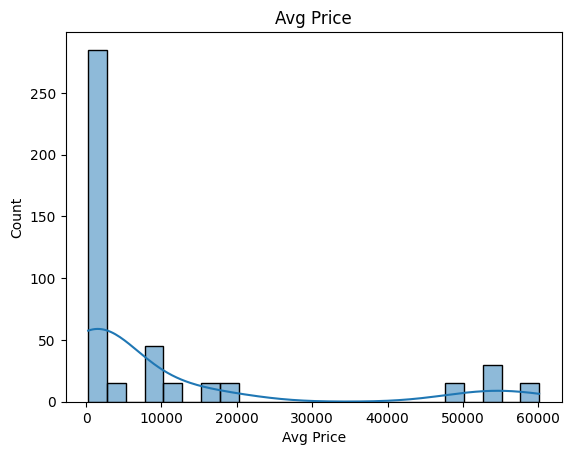

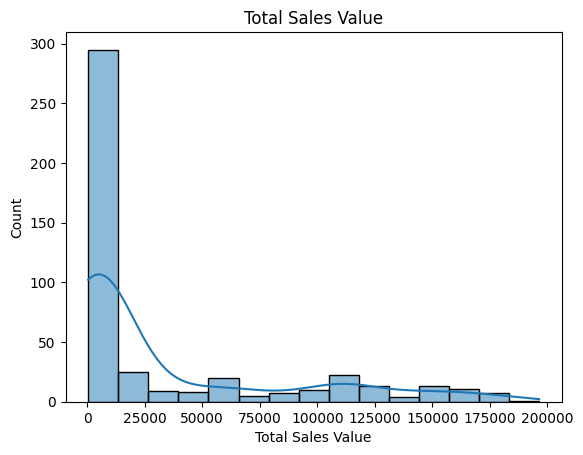

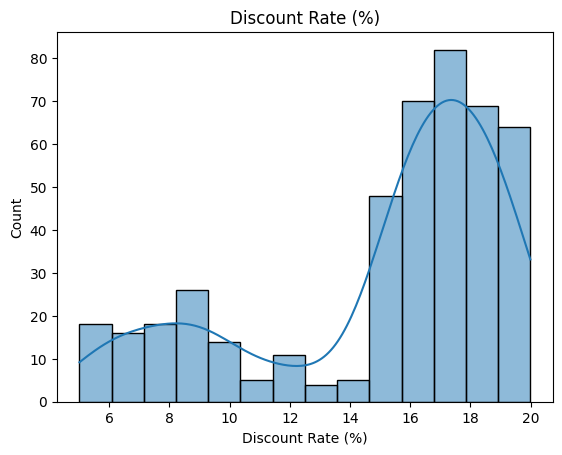

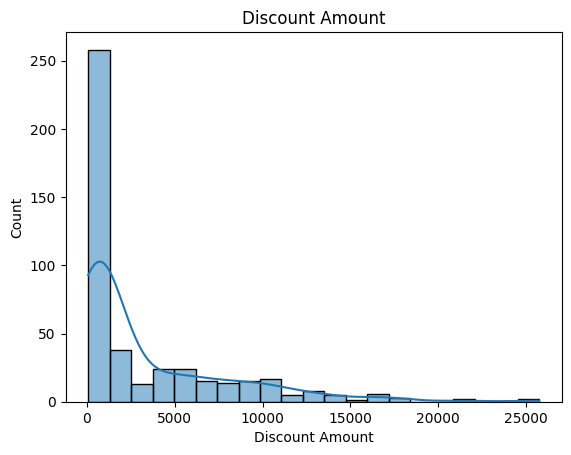

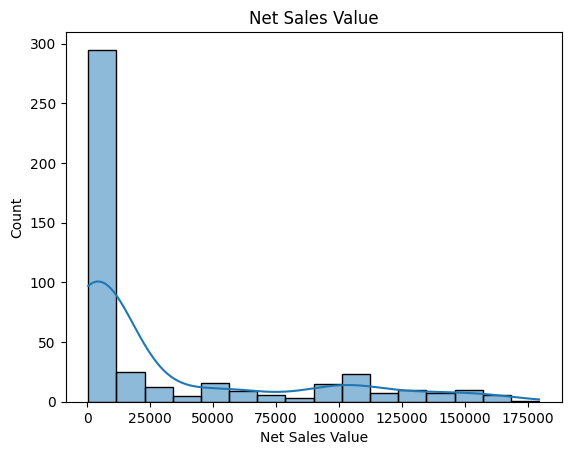

In [ ]:
for col in numeric_cols:
  sns.histplot(df[col],kde=True)
  plt.title(f'{col}')
  plt.show()

In [ ]:
skewness=df[numeric_cols].skew()
print( skewness)

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


In [ ]:
# Simple check for potential outliers using IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"Potential outliers (based on IQR): {len(outliers)}")

Potential outliers (based on IQR): 35


#Boxplots:

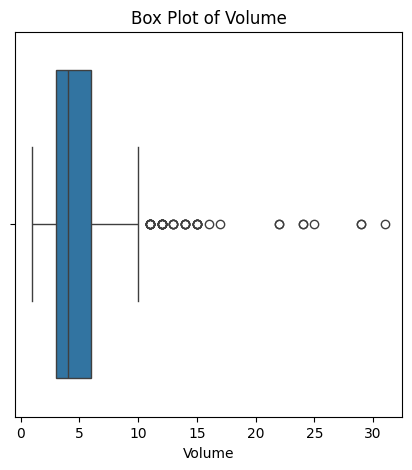

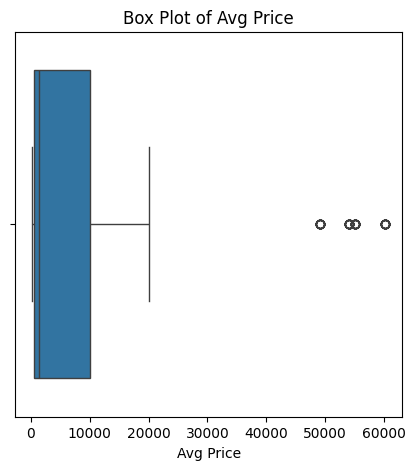

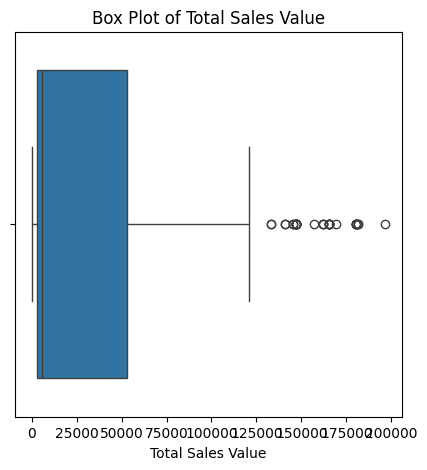

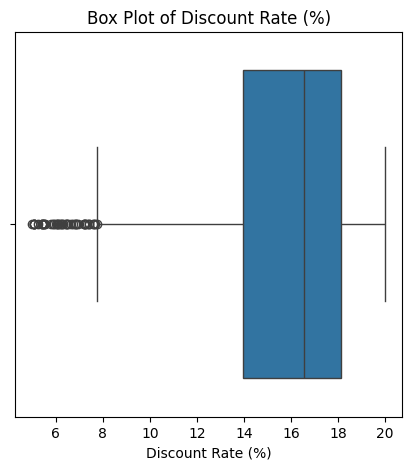

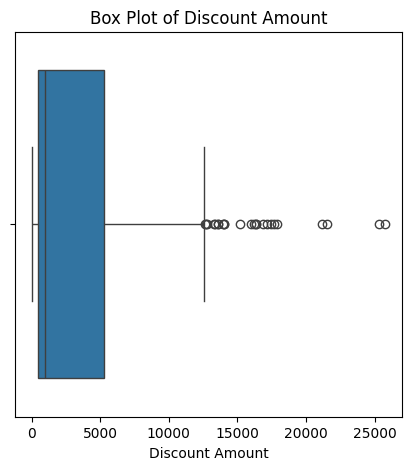

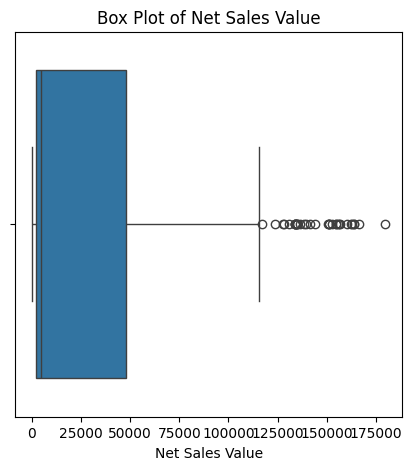

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

#●Bar Chart Analysis for Categorical Column:

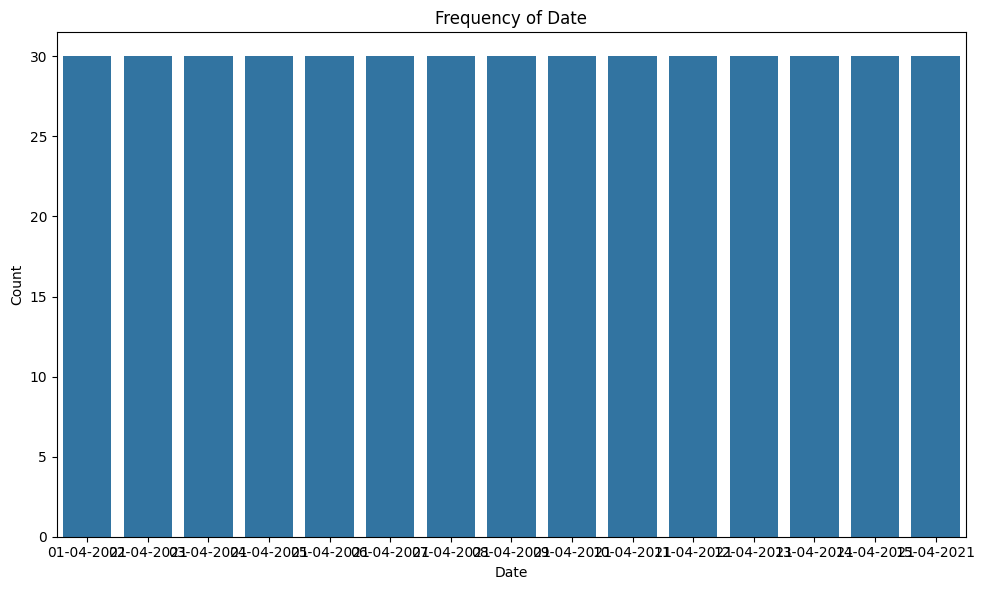

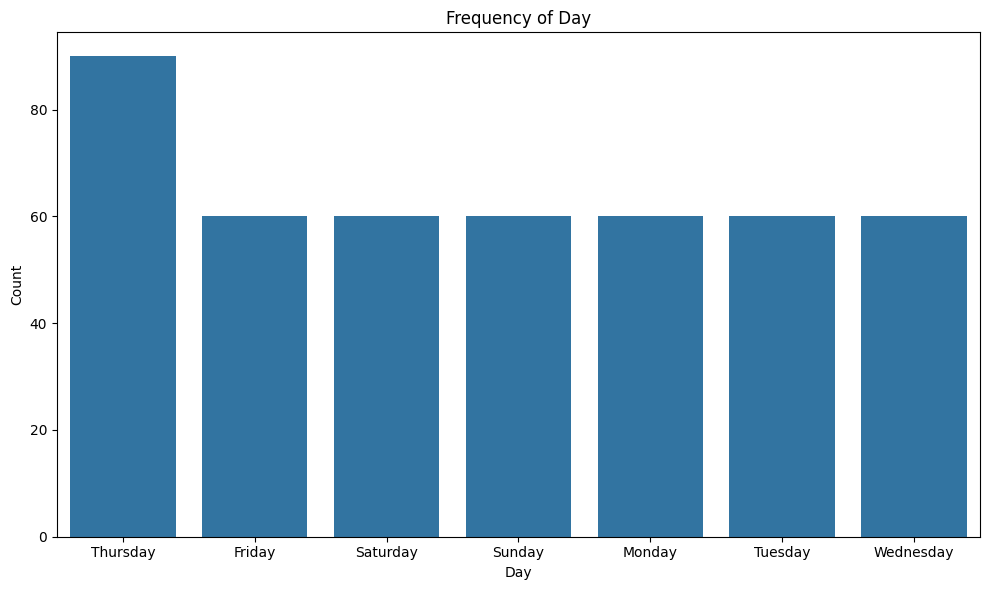

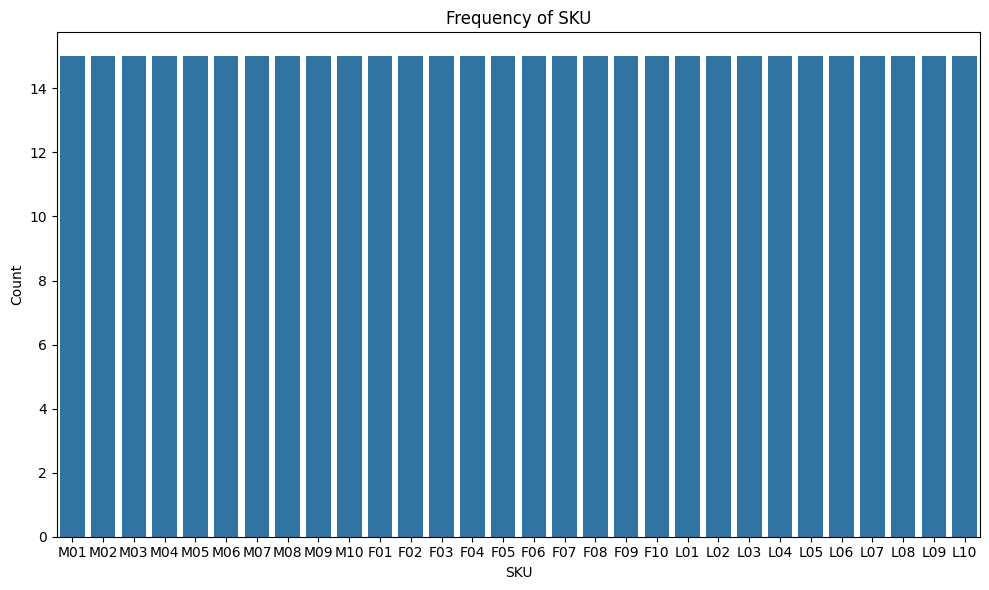

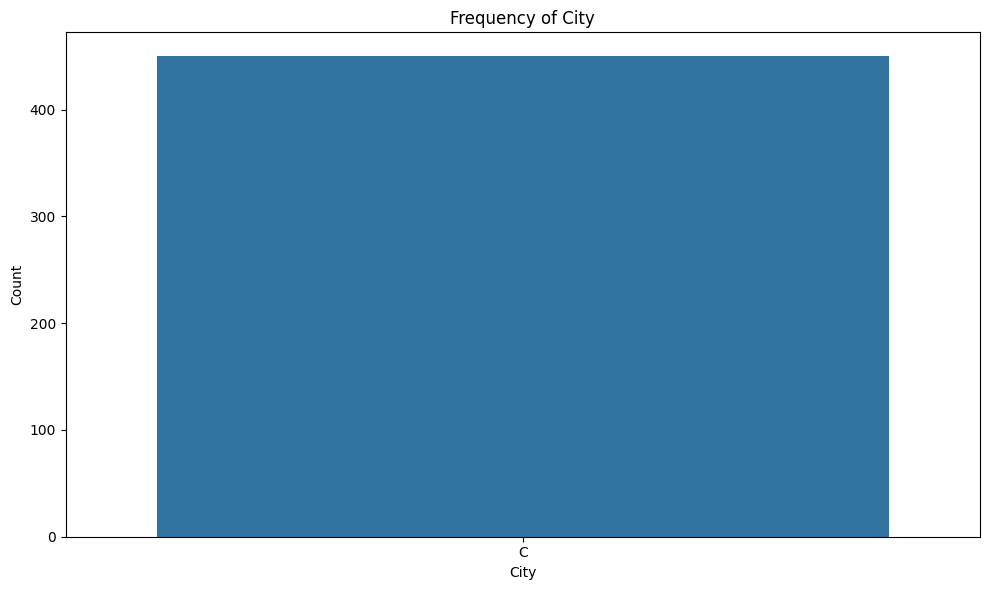

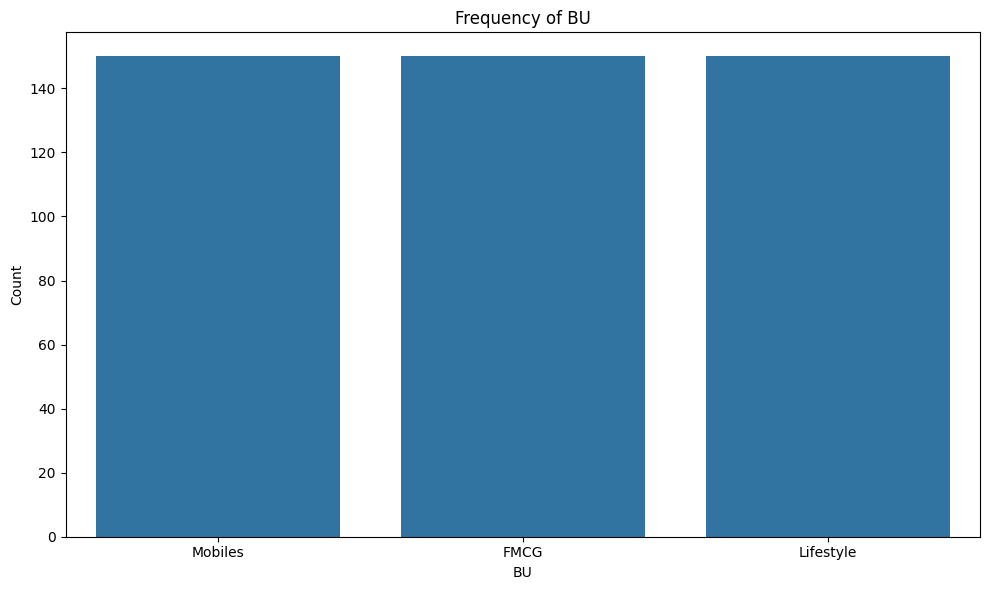

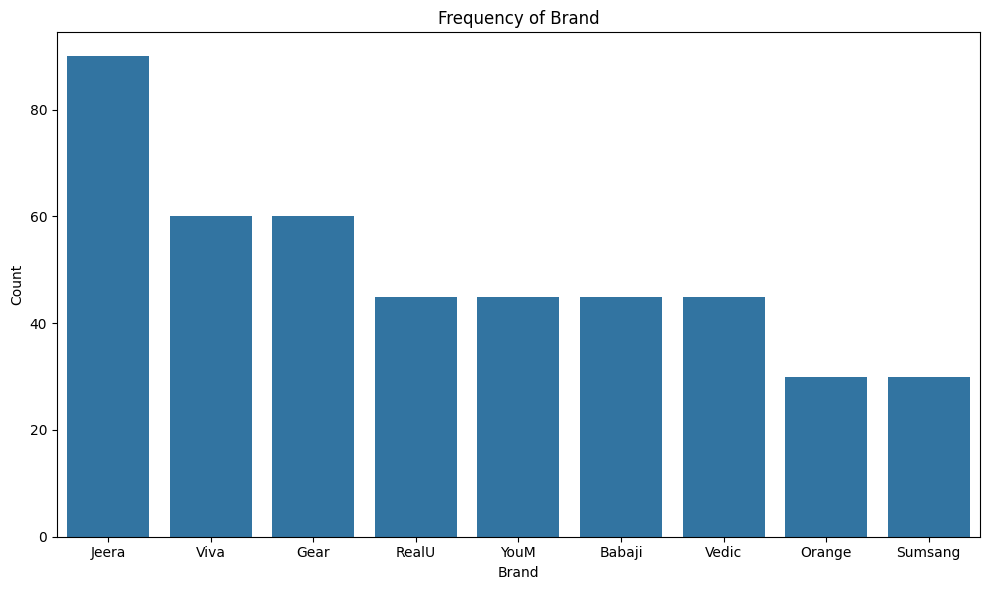

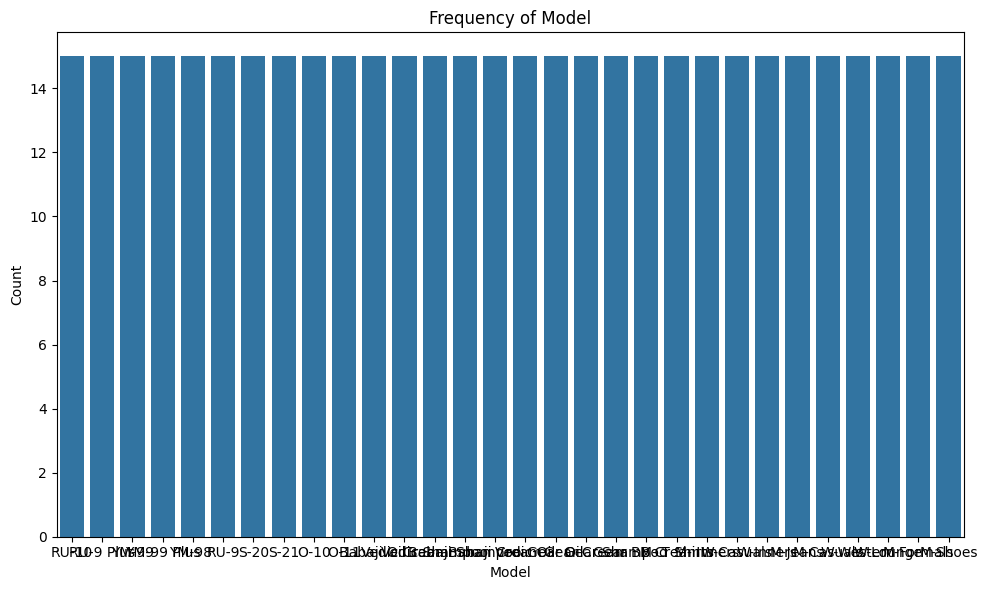

In [ ]:
for cols in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.barplot(x=df[cols].value_counts().index, y=df[cols].value_counts().values)
  plt.title(f'Frequency of {cols}')
  plt.xlabel(cols)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

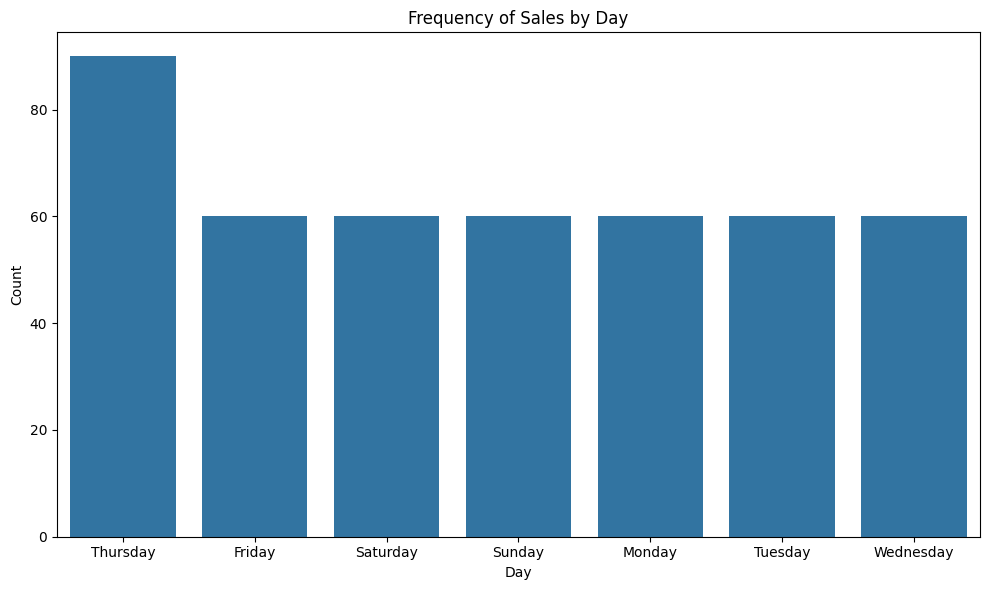

In [ ]:
day_counts = df['Day'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Frequency of Sales by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Standardization of Numerical Variables

Z-SCORE NORMALISATION is a technique used to rescale data so that it has
properties of a standard norma distribution(i.e. mean=0 and standard deviation =1)

Formula:- z= x-mu/sigma

  where: z = standardized value
         x = original data point
        mu = mean of the data
     sigma = standard deviation of the data



In [ ]:
for col in numeric_cols:
  mu = df[col].mean()
  sigma = df[col].std()
  df[col] = (df[col]-mu)/sigma

df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342


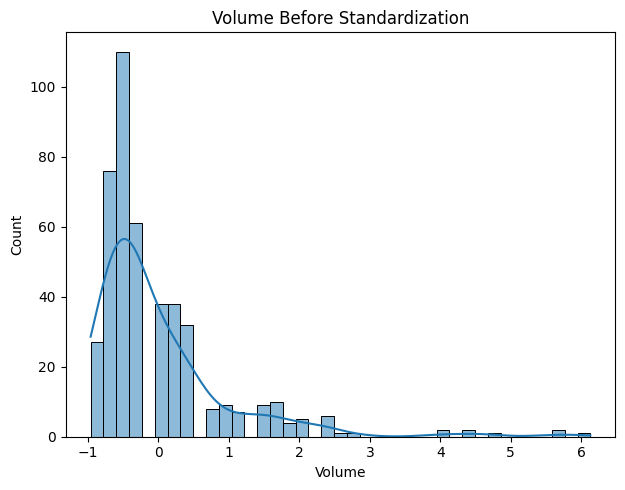

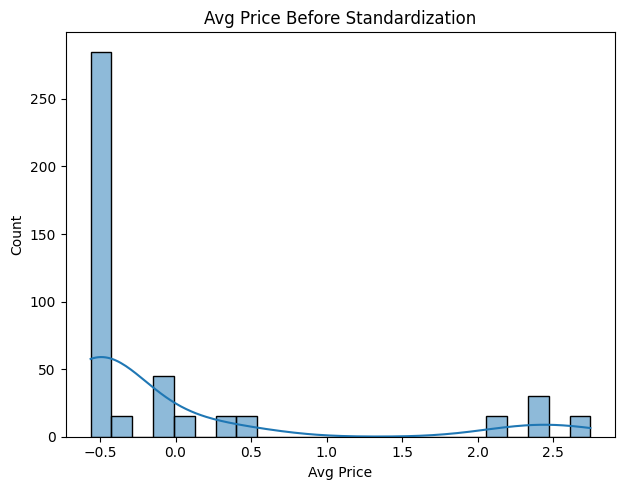

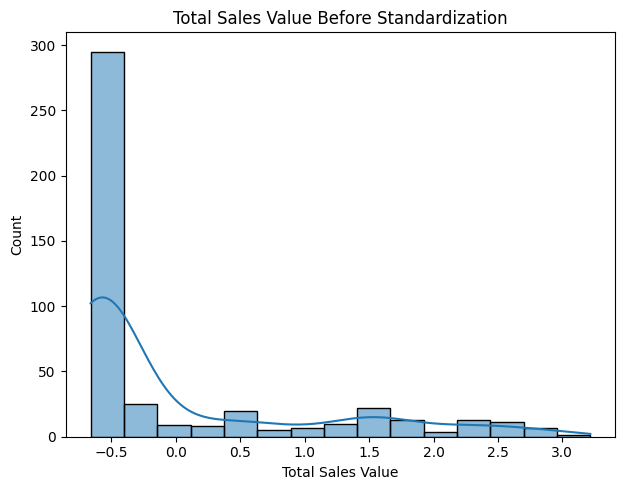

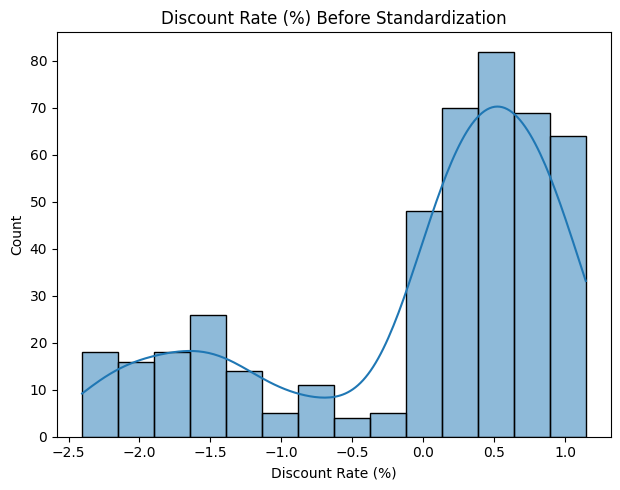

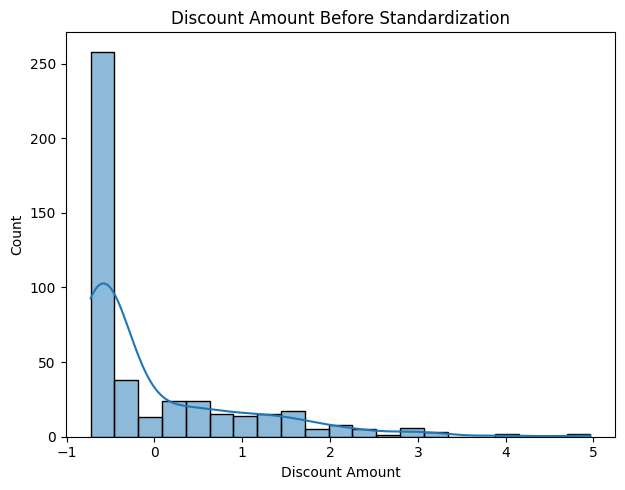

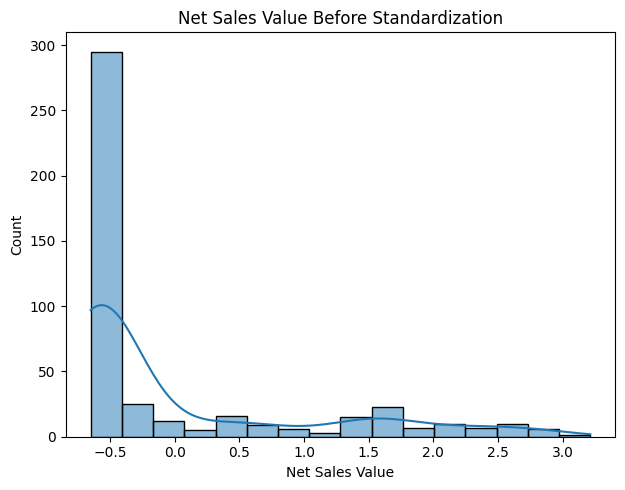

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1) # Before standardization
  sns.histplot(df[col], kde=True)
  plt.title(f'{col} Before Standardization')

  standardized_col_name = col + '_standardized'
  if standardized_col_name in df.columns: # Check if the standardized column exists
    plt.subplot(1, 2, 2) # After standardization
    sns.histplot(df[standardized_col_name], kde=True)
    plt.title(f'{col} After Standardization')

  plt.tight_layout()
  plt.show()

#Conversion of Categorical Data into Dummy Variables

●Objective: To transform categorical variables into a format that can be provided to ML algorithms.

In [ ]:
import pandas as pd

categorical_cols = ['Day', 'City', 'SKU', 'BU', 'Brand', 'Model']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols )

print("Transformed Dataset:")
df.head()

Transformed Dataset:


,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#Conclusion
From the descriptive analytics and data visualizations, we gained insights into the distribution and relationships between variables in the dataset. Some key findings include:

- Distribution of numerical variables: We observed the skewness and outliers in variables like 'Volume', 'Avg Price', and 'Total Sales Value'.
- Relationships between variables: We visualized the relationships between numerical and categorical variables using histograms and boxplots.

Importance of Data Preprocessing
Data preprocessing steps like standardization and one-hot encoding are crucial in data analysis and machine learning:

- Standardization: Helps to scale numerical variables to a common range, improving model performance and preventing feature dominance.
- One-hot encoding: Enables machine learning algorithms to handle categorical variables effectively, improving model accuracy and interpretability.

By applying these data preprocessing steps, we can:

- Improve model performance: Enhance the accuracy and reliability of machine learning models.
- Gain insights: Uncover hidden patterns and relationships in the data.
- Make informed decisions: Use data-driven insights to inform business strategies and decisions.

In conclusion, descriptive analytics, data visualization, and data preprocessing are essential steps in data analysis and machine learning. By applying these techniques, we can gain valuable insights and build robust models that drive business success.